In [ ]:
#check python version 
!python3 --version
!uname -a

Python 3.7.10
Linux eaeb5db9776f 5.4.109+ #1 SMP Tue Apr 20 19:55:43 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
#Install dependencies
!pip install mac-vendor-lookup
!pip install nest_asyncio
#!pip install tensorflow
#If tensorflow throw ''Illegal instruction (core dumped)'' consider building from scratch. instruction for Kali Linux 2021.2: 
#
#sudo apt install apt-transport-https curl gnupg                                                                                                                                                                                    100 ⨯
#curl -fsSL https://bazel.build/bazel-release.pub.gpg | gpg --dearmor > bazel.gpg
#sudo mv bazel.gpg /etc/apt/trusted.gpg.d/
#echo "deb [arch=amd64] https://storage.googleapis.com/bazel-apt stable jdk1.8" | sudo tee /etc/apt/sources.list.d/bazel.list
#sudo apt update && sudo apt install python3-dev python3-pip bazel -y
#pip install -U --user pip numpy~=1.19.2 wheel
#pip install -U --user keras_preprocessing --no-deps
#git clone https://github.com/tensorflow/tensorflow.git  
#cd tensorflow
#./configure # hit default if output of command 'grep flags -m1 /proc/cpuinfo | cut -d ":" -f 2 | tr '[:upper:]' '[:lower:]' | { read FLAGS; OPT="-march=native"; for flag in $FLAGS; do case "$flag" in "sse4_1" | "sse4_2" | "ssse3" | "fma" | "cx16" | "popcnt" | "avx" | "avx2") OPT+=" -m$flag";; esac; done; MODOPT=${OPT//_/\.}; echo "$MODOPT"; }' is '-march=native'
#if not check https://gcc.gnu.org/onlinedocs/gcc-4.5.3/gcc/i386-and-x86_002d64-Options.html 
#python3 -c "import tensorflow as tf"  # to test
#
!pip install sklearn
!pip install scapy

In [ ]:
import tensorflow as tf


In [5]:
#Import dependencies

import matplotlib.pyplot as plt
from datetime import datetime
import sklearn.preprocessing
import tensorflow as tf
#from scapy.all import *
import seaborn as sns
import nest_asyncio
import pandas as pd
import numpy as np
import warnings
import sklearn
import math
import time
import csv
import os
warnings.filterwarnings("ignore")

In [ ]:
#Set in scope AP
in_scope_AP = '98:DE:D0:F0:9F:2E'

### You need to set capabilities for binaries that need elevated permissions (root)

```zsh
sudo setcap cap_net_raw=eip /usr/bin/python3.9 
sudo setcap cap_net_raw=eip /usr/bin/scapy
sudo setcap cap_net_raw=eip /usr/bin/tcpdump
```

# Types of labels

#### Based on attacker experience and actions 

1. "skiddie" = "script_kiddie"
2. "hacker" = "motivated_attacker"
3. "HEO" = "human_error_or_normal_forget"

In [ ]:
df = pd.DataFrame(columns=['time', 'client_addr', 'AP_addr', 'BSSID', 'addr4', 'version', 'pad', 'present', 'Rate', 'len', 'TXFlags', 'notdecoded', 'proto', 'subtype', 'type', 'cfe', 'FCfield', 'ID', 'SC', 'Flags', 'ChannelFrequency', 'dBm_AntSignal', 'ChannelFlags', 'reason', 'label', 'obs'])
pkts = sniff(iface='wlan0', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=0
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'skiddie'+','+'sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0 '
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA

In [ ]:
df.head()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
0,[2021-06-02 14:25:09],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,0,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0
1,[2021-06-02 14:25:09],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,16,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0
2,[2021-06-02 14:25:09],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,14849,0,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0
3,[2021-06-02 14:25:09],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,32,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0
4,[2021-06-02 14:25:09],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,14849,16,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0


In [ ]:
pkts = sniff(iface='wlan0', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=100
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'skiddie'+','+'sudo wifite -c11'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
195,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,14849,752,NONE,NONE,NONE,NONE,7,skiddie,sudo wifite -c11
196,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,768,NONE,NONE,NONE,NONE,7,skiddie,sudo wifite -c11
197,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,784,NONE,NONE,NONE,NONE,7,skiddie,sudo wifite -c11
198,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,800,NONE,NONE,NONE,NONE,7,skiddie,sudo wifite -c11
199,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,14849,768,NONE,NONE,NONE,NONE,7,skiddie,sudo wifite -c11


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=200
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'skiddie'+','+'sudo besside-ng -W -v wlan0mon'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fc (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fc (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fc (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fc (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 50:78:b3:a5:fe:24 (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 50:78:b3:a5:fe:24 (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 50:78:b3:a5:fe:24 (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 50:78:b3:a5:fe:24 (TA=SA) > ff:ff:ff:ff:ff:ff (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification bc:2e:f6:72:1d:9c (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
295,[2021-06-03 02:47:00],FF:FF:FF:FF:FF:FF,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,65407,480,NONE,NONE,NONE,NONE,7,skiddie,sudo besside-ng -W -v wlan0mon
296,[2021-06-03 02:47:00],F0:C3:71:0C:BA:81,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,65407,496,NONE,NONE,NONE,NONE,7,skiddie,sudo besside-ng -W -v wlan0mon
297,[2021-06-03 02:47:02],FF:FF:FF:FF:FF:FF,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,65407,512,NONE,NONE,NONE,NONE,7,skiddie,sudo besside-ng -W -v wlan0mon
298,[2021-06-03 02:47:02],F0:C3:71:0C:BA:81,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,65407,528,NONE,NONE,NONE,NONE,7,skiddie,sudo besside-ng -W -v wlan0mon
299,[2021-06-03 02:47:02],FF:FF:FF:FF:FF:FF,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,65407,512,NONE,NONE,NONE,NONE,7,skiddie,sudo besside-ng -W -v wlan0mon


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=300
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'skiddie'+','+'sudo fern-wifi-cracker'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 0c:9d:92:b3:dc:90 (TA=SA) > b4:b6:86:6a:54:fa (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fa (TA=SA) > 0c:9d:92:b3:dc:90 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 0c:9d:92:b3:dc:90 (TA=SA) > b4:b6:86:6a:54:fa (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 0c:9d:92:b3:dc:90 (TA=SA) > b4:b6:86:6a:54:fa (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fa (TA=SA) > 0c:9d:92:b3:dc:90 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fa (TA=SA) > 0c:9d:92:b3:dc:90 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 0c:9d:92:b3:dc:90 (TA=SA) > b4:b6:86:6a:54:fa (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification b4:b6:86:6a:54:fa (TA=SA) > 0c:9d:92:b3:dc:90 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 0c:9d:92:b3:dc:90 (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
395,[2021-06-03 05:26:49],0C:9D:92:B3:DC:90,B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1456,NONE,NONE,NONE,NONE,7,skiddie,sudo fern-wifi-cracker
396,[2021-06-03 05:26:49],B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1472,NONE,NONE,NONE,NONE,7,skiddie,sudo fern-wifi-cracker
397,[2021-06-03 05:26:49],0C:9D:92:B3:DC:90,B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1488,NONE,NONE,NONE,NONE,7,skiddie,sudo fern-wifi-cracker
398,[2021-06-03 05:26:49],B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1504,NONE,NONE,NONE,NONE,7,skiddie,sudo fern-wifi-cracker
399,[2021-06-03 05:26:49],0C:9D:92:B3:DC:90,B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1520,NONE,NONE,NONE,NONE,7,skiddie,sudo fern-wifi-cracker


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=400
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'hacker'+','+'sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E  -c 24:62:AB:16:b7:9d wlan0mon & sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E  -c 46:FB:37:43:51:03 wlan0mon & '
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 24:62:ab:16:b7:9d (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 24:62:ab:16:b7:9d (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 24:62:ab:16:b7:9d (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 24:62:ab:16:b7:9d (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
495,[2021-06-03 13:36:27],98:DE:D0:F0:9F:2E,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,784,NONE,NONE,NONE,NONE,7,hacker,sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E -c...
496,[2021-06-03 13:36:27],24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,800,NONE,NONE,NONE,NONE,7,hacker,sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E -c...
497,[2021-06-03 13:36:27],98:DE:D0:F0:9F:2E,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,816,NONE,NONE,NONE,NONE,7,hacker,sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E -c...
498,[2021-06-03 13:36:27],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,736,NONE,NONE,NONE,NONE,7,hacker,sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E -c...
499,[2021-06-03 13:36:27],24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,832,NONE,NONE,NONE,NONE,7,hacker,sudo aireplay-ng -010 -a 98:DE:D0:F0:9F:2E -c...


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=500
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'hacker'+','+'sudo ./airgeddon.sh'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
595,[2021-06-03 14:20:49],CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,17824,FCS,2422,-88,CCK+2GHZ,1,hacker,sudo ./airgeddon.sh
596,[2021-06-03 14:20:49],CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,17824,FCS,2422,-88,CCK+2GHZ,1,hacker,sudo ./airgeddon.sh
597,[2021-06-03 14:20:49],CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,17824,FCS,2422,-87,CCK+2GHZ,1,hacker,sudo ./airgeddon.sh
598,[2021-06-03 14:20:49],CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,17840,FCS,2422,-86,CCK+2GHZ,1,hacker,sudo ./airgeddon.sh
599,[2021-06-03 14:20:49],CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,17840,FCS,2422,-86,CCK+2GHZ,1,hacker,sudo ./airgeddon.sh


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=600
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'hacker'+','+'sudo ./airgeddon.sh #DDoS'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Disassociation 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
695,[2021-06-03 14:37:07],E4:9A:79:C2:56:32,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,80,NONE,NONE,NONE,NONE,47,hacker,sudo ./airgeddon.sh #DDoS
696,[2021-06-03 14:25:06],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1536,NONE,NONE,NONE,NONE,7,hacker,sudo ./airgeddon.sh #DDoS
697,[2021-06-03 14:25:06],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1552,NONE,NONE,NONE,NONE,7,hacker,sudo ./airgeddon.sh #DDoS
698,[2021-06-03 14:25:06],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1568,NONE,NONE,NONE,NONE,7,hacker,sudo ./airgeddon.sh #DDoS
699,[2021-06-03 14:25:06],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,,14849,1584,NONE,NONE,NONE,NONE,7,hacker,sudo ./airgeddon.sh #DDoS


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=700
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'hacker'+','+'sudo python3 deauthenticator.py -i wlan0mon -c5 -a 98:DE:D0:F0:9F:2E -t 46:FB:37:43:51:03 # scapy version'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
795,[2021-06-03 16:03:32],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,1,hacker,sudo python3 deauthenticator.py -i wlan0mon -c...
796,[2021-06-03 16:03:32],24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,1,hacker,sudo python3 deauthenticator.py -i wlan0mon -c...
797,[2021-06-03 16:03:32],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,1,hacker,sudo python3 deauthenticator.py -i wlan0mon -c...
798,[2021-06-03 16:03:32],24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,1,hacker,sudo python3 deauthenticator.py -i wlan0mon -c...
799,[2021-06-03 16:03:32],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,1,hacker,sudo python3 deauthenticator.py -i wlan0mon -c...


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=800
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'hacker'+','+'# Special hardware # WiFi Pineapple Nano #'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
895,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,51200,11088,FCS,2462,-28,CCK+2GHZ,256,hacker,# Special hardware # WiFi Pineapple Nano #
896,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,,51200,11104,FCS,2462,-29,CCK+2GHZ,256,hacker,# Special hardware # WiFi Pineapple Nano #
897,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,51200,11104,FCS,2462,-28,CCK+2GHZ,256,hacker,# Special hardware # WiFi Pineapple Nano #
898,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,51200,11104,FCS,2462,-28,CCK+2GHZ,256,hacker,# Special hardware # WiFi Pineapple Nano #
899,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,51200,11104,FCS,2462,-28,CCK+2GHZ,256,hacker,# Special hardware # WiFi Pineapple Nano #


In [ ]:
pkts = sniff(iface='wlan0mon', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=900
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'HEO'+','+'other'
  df.loc[i] = list(a.split(','))
  i=i+1

RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 46:fb:37:43:51:03 (TA=SA

In [ ]:
n=100
#df.drop(df.tail(n).index,inplace=True) # drop last n rows

In [ ]:
df.tail()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
995,[2021-06-04 09:50:26],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,0,0,NONE,NONE,NONE,NONE,11,HEO,other
996,[2021-06-04 09:50:26],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,11,HEO,other
997,[2021-06-04 09:50:26],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,0,0,NONE,NONE,NONE,NONE,11,HEO,other
998,[2021-06-04 09:50:27],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,,NONE,8,...,,0,0,NONE,NONE,NONE,NONE,12,HEO,other
999,[2021-06-04 09:50:27],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,,0,0,NONE,NONE,NONE,NONE,12,HEO,other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time              1000 non-null   object
 1   client_addr       1000 non-null   object
 2   AP_addr           1000 non-null   object
 3   BSSID             1000 non-null   object
 4   addr4             1000 non-null   object
 5   version           1000 non-null   object
 6   pad               1000 non-null   object
 7   present           1000 non-null   object
 8   Rate              1000 non-null   object
 9   len               1000 non-null   object
 10  TXFlags           1000 non-null   object
 11  notdecoded        1000 non-null   object
 12  proto             1000 non-null   object
 13  subtype           1000 non-null   object
 14  type              1000 non-null   object
 15  cfe               1000 non-null   object
 16  FCfield           1000 non-null   object
 17  ID             

In [ ]:
df.to_csv("raw_deauth_disassoc.csv")

In [ ]:
!head wifi_deauth_disassoc.csv 

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,TXFlags,notdecoded,proto,subtype,type,cfe,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
0,[2021-06-02 23:56:30],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,NOACK+NOSEQ,B'',0,12,0,NONE,,14849,0,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0 
1,[2021-06-02 23:56:30],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,NOACK+NOSEQ,B'',0,12,0,NONE,,14849,16,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0 
2,[2021-06-02 23:56:30],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,,B'\X00',0,12,0,NONE,,14849,0,NONE,NONE,NONE,NONE,7,skiddie,sudo aireplay-ng -0 0 -a 98:DE:D0:F0:9F:2E wlan0 
3,[2021-06-02 23:56:30],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,NOACK+NOSEQ,B'',0,12,0,NONE,,1484

In [ ]:
df1 = pd.DataFrame(columns=['time', 'client_addr', 'AP_addr', 'BSSID', 'addr4', 'version', 'pad', 'present', 'Rate', 'len', 'TXFlags', 'notdecoded', 'proto', 'subtype', 'type', 'cfe', 'FCfield', 'ID', 'SC', 'Flags', 'ChannelFrequency', 'dBm_AntSignal', 'ChannelFlags', 'reason', 'label', 'obs'])
pkts = sniff(iface='wlan0', count=100, filter='type mgt and (subtype deauth or subtype disassoc)' ,prn=lambda x:x.summary())
i=1000
for pkt in pkts:
  timestamp = datetime.fromtimestamp(pkt.time)
  #print(timestamp)
  a='['+timestamp.strftime('%Y-%m-%d %H:%M:%S')+']'+','+str(pkt.addr1).upper()+','+str(pkt.addr2).upper()+','+ \
        str(pkt.addr3).upper()+','+str(pkt.addr4).upper()+','+str(pkt.version).upper()+','+ \
        str(pkt.pad).upper()+','+str(pkt.present).upper()+','+str(pkt.Rate).upper()+','+ \
        str(pkt.len).upper()+','+str(pkt.TXFlags).upper()+','+str(pkt.notdecoded).upper()+','+ \
        str(pkt.proto).upper()+','+str(pkt.subtype).upper()+','+str(pkt.type).upper()+','+str(pkt.cfe).upper()+','+ \
        str(pkt.FCfield).upper()+','+str(pkt.ID).upper()+','+str(pkt.SC).upper()+','+ \
        str(pkt.Flags).upper()+','+str(pkt.ChannelFrequency).upper()+','+ \
        str(pkt.dBm_AntSignal).upper()+','+str(pkt.ChannelFlags).upper()+','+ \
        str(pkt.reason).upper()+','+'HEO'+','+'human forget'
  #print(a)
  df1.loc[i] = list(a.split(','))
  i=i+1 

RadioTap / 802.11 Management Disassociation 46:fb:37:43:51:03 (TA=SA) > 98:de:d0:f0:9f:2e (RA=DA) / Dot11Disas
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 46:fb:37:43:51:03 (RA=DA) / Dot11Deauth
RadioTap / 802.11 Management Deauthentification 98:de:d0:f0:9f:2e (TA=SA) > 4

In [ ]:
df1.head()

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
1000,[2021-06-05 03:10:56],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,,14849,52912,FCS,2437,-35,CCK+2GHZ,8,HEO,human forget
1001,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,,14849,32752,FCS,2437,-35,CCK+2GHZ,2,HEO,human forget
1002,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,32752,FCS,2437,-35,CCK+2GHZ,2,HEO,human forget
1003,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,32752,FCS,2437,-34,CCK+2GHZ,2,HEO,human forget
1004,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,RETRY,14849,32752,FCS,2437,-35,CCK+2GHZ,2,HEO,human forget


In [ ]:
df1.to_csv("add_normal_forget.csv") 

In [ ]:
!head add_normal_forget.csv 

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,TXFlags,notdecoded,proto,subtype,type,cfe,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,obs
1000,[2021-06-05 03:10:56],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+RADIOTAPNS+EXT,1.0,36,NONE,B'\XDD\X00',0,10,0,NONE,,14849,52912,FCS,2437,-35,CCK+2GHZ,8,HEO,human forget
1001,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+RADIOTAPNS+EXT,1.0,36,NONE,B'\XDD\X00',0,12,0,NONE,,14849,32752,FCS,2437,-35,CCK+2GHZ,2,HEO,human forget
1002,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+RADIOTAPNS+EXT,1.0,36,NONE,B'\XDD\X00',0,12,0,NONE,RETRY,14849,32752,FCS,2437,-35,CCK+2GHZ,2,HEO,human forget
1003,[2021-06-05 03:10:57],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,N

In [ ]:
!sed -i '1d' add_normal_forget.csv
!cat raw_deauth_disassoc.csv add_normal_forget.csv > total.csv

In [ ]:
#to read backup csv 
df = pd.read_csv("./total.csv")
df.describe()

,Unnamed: 0,version,pad,len,proto,subtype,type,ID,SC,reason
count,1100.000000,1100.0,1100.0,1100.000000,1100.0,1100.000000,1100.0,1100.000000,1100.000000,1100.000000
mean,549.500000,0.0,0.0,17.460909,0.0,11.838182,0.0,19695.804545,8153.294545,37.438182
std,317.686953,0.0,0.0,10.442238,0.0,0.545639,0.0,18725.039006,15051.659189,72.490009
min,0.000000,0.0,0.0,8.000000,0.0,10.000000,0.0,0.000000,0.000000,0.000000
25%,274.750000,0.0,0.0,12.000000,0.0,12.000000,0.0,14849.000000,124.000000,6.000000
50%,549.500000,0.0,0.0,12.000000,0.0,12.000000,0.0,14849.000000,480.000000,7.000000
75%,824.250000,0.0,0.0,13.000000,0.0,12.000000,0.0,14849.000000,10976.000000,47.000000
max,1099.000000,0.0,0.0,36.000000,0.0,12.000000,0.0,65407.000000,60528.000000,256.000000


In [ ]:
df.drop(["obs"],axis=1,inplace=True) #Drop comments
df.head(1) 

,Unnamed: 0,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,...,cfe,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label
0,0,[2021-06-02 23:56:30],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,...,NONE,NaN,14849,0,NONE,NONE,NONE,NONE,7,skiddie


In [ ]:
df = df.drop(df.columns[[0]], axis=1) #Drop index
df.tail(1)

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,cfe,FCfield,ID,SC,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label
1099,[2021-06-05 03:14:25],98:DE:D0:F0:9F:2E,E4:9A:79:C2:56:32,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,NONE,NaN,14849,15616,FCS,2437,-38,CCK+2GHZ,8,HEO


In [ ]:
#Define and test MAC lookup 

nest_asyncio.apply()
mac = MacLookup()
mac.update_vendors()  # <- This can take a few seconds for the download

def find_mac(mac_address):
    print(mac.lookup(mac_address))

print("Teste mac-vendor-lookup:")
print(find_mac("E4:9A:79:C2:56:32"))

Teste mac-vendor-lookup:
Apple, Inc.
None


In [ ]:
'''
df['same_time'] = (df['time'] == df['time'].shift(1)).cumsum()
df['same_AP_addr'] = (df['AP_addr'] == df['AP_addr'].shift(1)).cumsum()
df['same_client_addr'] = (df['client_addr'] == df['client_addr'].shift(1)).cumsum()
df['same_BSSID'] = (df['BSSID'] == df['BSSID'].shift(1)).cumsum()
'''

In [ ]:
df['same_time'] = (df['time'] == df['time'].shift(1)).groupby((df['time'] != df['time'].shift(1)).cumsum()).cumsum()
df['same_AP_addr'] = (df['AP_addr'] == df['AP_addr'].shift(1)).groupby((df['AP_addr'] != df['AP_addr'].shift(1)).cumsum()).cumsum()
df['same_client_addr'] = (df['client_addr'] == df['client_addr'].shift(1)).groupby((df['client_addr'] != df['client_addr'].shift(1)).cumsum()).cumsum()
df['same_BSSID'] = (df['BSSID'] == df['BSSID'].shift(1)).groupby((df['BSSID'] != df['BSSID'].shift(1)).cumsum()).cumsum()

In [ ]:
df.sample(10)

,time,client_addr,AP_addr,BSSID,addr4,version,pad,present,Rate,len,...,Flags,ChannelFrequency,dBm_AntSignal,ChannelFlags,reason,label,same_time,same_AP_addr,same_client_addr,same_BSSID
722,[2021-06-03 16:03:28],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,NONE,NONE,NONE,NONE,1,hacker,3,17,0,88
406,[2021-06-03 13:36:26],98:DE:D0:F0:9F:2E,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,NONE,NONE,NONE,NONE,7,hacker,6,0,0,6
643,[2021-06-03 14:37:05],98:DE:D0:F0:9F:2E,E4:9A:79:C2:56:32,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS,1.0,12,...,NONE,NONE,NONE,NONE,47,hacker,1,1,1,9
299,[2021-06-03 02:47:02],FF:FF:FF:FF:FF:FF,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,NONE,NONE,NONE,NONE,7,skiddie,2,10,0,10
670,[2021-06-03 14:37:05],98:DE:D0:F0:9F:2E,E4:9A:79:C2:56:32,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,NONE,NONE,NONE,NONE,47,hacker,28,1,1,36
934,[2021-06-04 09:50:04],98:DE:D0:F0:9F:2E,46:FB:37:43:51:03,46:FB:37:43:51:03,NONE,0,0,NaN,NONE,8,...,NONE,NONE,NONE,NONE,94,HEO,0,34,34,34
892,[2021-06-04 08:04:16],46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,TSFT+FLAGS+RATE+CHANNEL+DBM_ANTSIGNAL+RXFLAGS+...,1.0,36,...,FCS,2462,-28,CCK+2GHZ,256,hacker,55,56,56,56
249,[2021-06-03 02:45:19],00:F6:20:41:95:94,50:78:B3:A5:FE:24,50:78:B3:A5:FE:24,NONE,0,0,RATE+TXFLAGS,1.0,12,...,NONE,NONE,NONE,NONE,7,skiddie,2,10,0,10
352,[2021-06-03 05:26:48],B4:B6:86:6A:54:FA,0C:9D:92:B3:DC:90,0C:9D:92:B3:DC:90,NONE,0,0,RATE+TXFLAGS,1.0,12,...,NONE,NONE,NONE,NONE,7,skiddie,52,0,0,52
199,[2021-06-03 00:00:25],FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,NONE,0,0,RATE+TXFLAGS+B18,1.0,13,...,NONE,NONE,NONE,NONE,7,skiddie,99,199,199,199


In [ ]:
print(df.head())
print(df.iloc[200:205])
print(df.iloc[400:405])
print(df.iloc[700:705])
print(df.iloc[1000:1005])

In [ ]:
#Define and test entropy function

def Entropy(text):
    log2=lambda x:math.log(x)/math.log(2)
    exr={}
    infoc=0
    for each in text:
        try:
            exr[each]+=1
        except:
            exr[each]=1
    textlen=len(text)
    for k,v in exr.items():
        freq  =  1.0*v/textlen
        infoc+=freq*log2(freq)
    infoc*=-1
    return infoc
 
while True:
  try:
    print(Entropy(input('>>>')))
  except KeyboardInterrupt:
    print('Test over!')
    break

Test over!


In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [ ]:
for index, row in df.iterrows():
  df.at[index , 'time'] = datetime.strptime(row['time'], '[%Y-%m-%d %H:%M:%S]')
  df.at[index , 'Client_BCAST'] = 1 if row['client_addr'] == 'FF:FF:FF:FF:FF:FF' else 0
  df.at[index , 'in_scope_AP'] = 1 if row['AP_addr'] == in_scope_AP or row['BSSID'] == in_scope_AP else 0
  df.at[index , 'Rate'] = 1 if row['Rate'] == '1.0' else 0
  df.at[index , 'TXFlags_NOACK'] = 1 if 'NOACK' in str(row['TXFlags']) else 0
  df.at[index , 'TXFlags_NOSEQ'] = 1 if 'NOSEQ' in str(row['TXFlags']) else 0
  df.at[index , 'TXFlags_TX_FAIL'] = 1 if 'TX_FAIL' in str(row['TXFlags']) else 0
  df.at[index , 'FCfield_RETRY'] = 1 if 'RETRY' in str(row['FCfield']) else 0
  df.at[index , 'FCS'] = 1 if 'FCS' in str(row['Flags']) else 0
  if row['dBm_AntSignal'] == 'NONE' : df.at[index , 'dBm_AntSignal'] = 0
  if row['ChannelFrequency'] == 'NONE' : df.at[index , 'ChannelFrequency'] = 0
  df.at[index , 'ChannelFlags_2GHZ'] = 1 if '2GHZ' in str(row['ChannelFlags']) else 0
  df.at[index , 'entropy_of_notdecoded'] = Entropy(row['notdecoded'])
  df.at[index , 'TSFT'] = 1 if 'TSFT' in str(row['present']) else 0
  df.at[index , 'CHANNEL'] = 1 if 'CHANNEL' in str(row['present']) else 0
  df.at[index , 'RXFLAGS'] = 1 if 'RXFLAGS' in str(row['present']) else 0
  df.at[index , 'RADIOTAPNS'] = 1 if 'RADIOTAPNS' in str(row['present']) else 0
  df.at[index , 'EXT'] = 1 if 'EXT' in str(row['present']) else 0

In [ ]:
df=df.drop(['addr4', 'version', 'pad', 'present', 'TXFlags', 'notdecoded', 'proto', 'type', 'cfe', 'FCfield', 'Flags', 'ChannelFlags'],axis=1)

df.sample(5)

,time,client_addr,AP_addr,BSSID,Rate,len,subtype,ID,SC,ChannelFrequency,...,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT
774,2021-06-03 16:03:31,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,0,8,12,0,0,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
470,2021-06-03 13:36:27,98:DE:D0:F0:9F:2E,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,1,12,12,14849,560,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
460,2021-06-03 13:36:27,24:62:AB:16:B7:9D,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,480,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
745,2021-06-03 16:03:29,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,0,8,12,0,0,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
1028,2021-06-05 03:11:35,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,36,12,14849,40256,2437,...,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0


In [ ]:
df

,time,client_addr,AP_addr,BSSID,Rate,len,subtype,ID,SC,ChannelFrequency,...,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT
0,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,0,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
1,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,16,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
2,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,13,12,14849,0,0,...,0.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0
3,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,32,0,...,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
4,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,13,12,14849,16,0,...,0.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2021-06-05 03:14:19,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,36,12,14849,22880,2437,...,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0
1096,2021-06-05 03:14:19,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,36,12,14849,22880,2437,...,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0
1097,2021-06-05 03:14:19,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,36,12,14849,22880,2437,...,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0
1098,2021-06-05 03:14:19,46:FB:37:43:51:03,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,36,12,14849,22880,2437,...,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.to_csv("enriched_1.csv") 

In [ ]:
!head enriched_1.csv 

,time,client_addr,AP_addr,BSSID,Rate,len,subtype,ID,SC,ChannelFrequency,dBm_AntSignal,reason,label,same_time,same_AP_addr,same_client_addr,same_BSSID,Client_BCAST,in_scope_AP,TXFlags_NOACK,TXFlags_NOSEQ,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT
0,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,0,0,0,7,skiddie,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9182958340544896,0.0,0.0,0.0,0.0,0.0
1,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,16,0,0,7,skiddie,1,1,1,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9182958340544896,0.0,0.0,0.0,0.0,0.0
2,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,13,12,14849,0,0,0,7,skiddie,2,2,2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2359263506290326,0.0,0.0,0.0,0.0,0.0
3,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,32,0,0,7,skiddie,3,3,3,3,1.0,1.0,1.0,1.0,

In [ ]:
!ls

/content


In [7]:
df = pd.read_csv("./enriched_1.csv")
df.sample(3)

,Unnamed: 0,time,client_addr,AP_addr,BSSID,Rate,len,subtype,ID,SC,ChannelFrequency,dBm_AntSignal,reason,label,same_time,same_AP_addr,same_client_addr,same_BSSID,Client_BCAST,in_scope_AP,TXFlags_NOACK,TXFlags_NOSEQ,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT
75,75,2021-06-02 23:56:30,FF:FF:FF:FF:FF:FF,98:DE:D0:F0:9F:2E,98:DE:D0:F0:9F:2E,1,12,12,14849,608,0,0,7,skiddie,75,75,75,75,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0
580,580,2021-06-03 14:20:49,CC:B1:1A:DA:56:04,80:8C:97:74:2C:BA,80:8C:97:74:2C:BA,1,36,12,14849,17776,2422,-88,1,hacker,5,19,19,19,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0
259,259,2021-06-03 02:45:27,F0:C3:71:0C:BA:81,BC:2E:F6:72:1D:9C,BC:2E:F6:72:1D:9C,1,13,12,65407,368,0,0,7,skiddie,3,9,0,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df[[c for c in df if c not in ['label']] + ['label']]

In [9]:
df = df.drop(['time', 'client_addr', 'AP_addr', 'BSSID'], axis=1)

In [10]:
df = df.drop(df.columns[[0]], axis=1)

In [11]:
mapping = {'skiddie':0, 'HEO': 1, 'hacker':2}
df['label'] = df['label'].replace(mapping)

In [275]:
#df.loc[:, df.columns != 'label'] = df.loc[:, df.columns != 'label'].astype(float)

In [12]:
df

,Rate,len,subtype,ID,SC,ChannelFrequency,dBm_AntSignal,reason,same_time,same_AP_addr,same_client_addr,same_BSSID,Client_BCAST,in_scope_AP,TXFlags_NOACK,TXFlags_NOSEQ,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT,label
0,1,12,12,14849,0,0,0,7,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
1,1,12,12,14849,16,0,0,7,1,1,1,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
2,1,13,12,14849,0,0,0,7,2,2,2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0,0
3,1,12,12,14849,32,0,0,7,3,3,3,3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
4,1,13,12,14849,16,0,0,7,4,4,4,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,36,12,14849,22880,2437,-34,2,6,16,6,95,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0,1
1096,1,36,12,14849,22880,2437,-35,2,7,17,7,96,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0,1
1097,1,36,12,14849,22880,2437,-35,2,8,18,8,97,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0,1
1098,1,36,12,14849,22880,2437,-34,2,9,19,9,98,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0,1


In [312]:
target = df['label']
target.sample(n=5)

456    2
109    0
20     0
235    0
656    2
Name: label, dtype: int64

In [313]:
train, validate, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

In [286]:
train = train.dropna()
test = test.dropna()
validate = validate.dropna()

In [314]:
train.head(10)

,Rate,len,subtype,ID,SC,ChannelFrequency,dBm_AntSignal,reason,same_time,same_AP_addr,same_client_addr,same_BSSID,Client_BCAST,in_scope_AP,TXFlags_NOACK,TXFlags_NOSEQ,TXFlags_TX_FAIL,FCfield_RETRY,FCS,ChannelFlags_2GHZ,entropy_of_notdecoded,TSFT,CHANNEL,RXFLAGS,RADIOTAPNS,EXT,label
119,1,12,12,14849,160,0,0,7,19,119,119,119,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
1049,1,36,12,14849,464,2437,-35,2,4,4,4,49,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.550341,1.0,1.0,1.0,1.0,1.0,1
322,1,12,12,14849,288,0,0,7,22,0,0,22,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
900,0,8,12,0,0,0,0,85,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,1
180,1,12,12,14849,656,0,0,7,80,180,180,180,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,0
934,0,8,12,0,0,0,0,94,0,34,34,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,1
471,1,12,12,14849,560,0,0,7,23,0,1,71,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,2
846,1,36,12,51200,10992,2462,-27,256,9,10,10,10,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.732159,1.0,1.0,1.0,1.0,1.0,2
252,1,13,12,65407,304,0,0,7,2,2,1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.235926,0.0,0.0,0.0,0.0,0.0,0
420,1,12,12,14849,160,0,0,7,20,0,0,20,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.918296,0.0,0.0,0.0,0.0,0.0,2


In [315]:
train.shape

(880, 27)

In [322]:
X = train.values[:,:26]
X = np.array(X, dtype=np.float)
X[:5]

array([[ 1.00000000e+00,  1.20000000e+01,  1.20000000e+01,
         1.48490000e+04,  1.60000000e+02,  0.00000000e+00,
         0.00000000e+00,  7.00000000e+00,  1.90000000e+01,
         1.19000000e+02,  1.19000000e+02,  1.19000000e+02,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.18295834e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  3.60000000e+01,  1.20000000e+01,
         1.48490000e+04,  4.64000000e+02,  2.43700000e+03,
        -3.50000000e+01,  2.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.90000000e+01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  2.55034071e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00

In [323]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,26:27]])
y[:5]

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [364]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(3)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.10159581,  0.41629565, -0.41819052,  0.02165521,  0.78589391],
       [ 0.79258618, -0.74882938, -0.58551424, -0.89706559, -0.11838031],
       [-0.94024758, -0.08633355,  0.2982881 , -0.44302543,  0.3525098 ],
       [ 0.18172563, -0.95203624,  0.11770818, -0.48149511, -0.16979761],
       [-0.43294984,  0.38627584, -0.11909256, -0.68626452,  0.08929804],
       [ 0.56062953, -0.38727294, -0.55608423, -0.22405748,  0.8727673 ],
       [ 0.95199084,  0.34476735,  0.80566822,  0.69150174, -0.24401192],
       [-0.81556598,  0.30682181,  0.11568152, -0.27687047, -0.54989099],
       [-0.18696017, -0.0621195 , -0.46152884, -0.41641445, -0.0846272 ],
       [ 0.72106783,  0.17250581, -0.43302428, -0.44404499, -0.09075585],
       [-0.58917931, -0.59724258,  0.02807012, -0.82554126, -0.03282894],
       [-0.27564758,  0.41537324,  0.49349245,  0.38218584,  0.37836083],
       [-0.25279975,  0.33626961, -0.32030267,  0.14558774, -0.34838568],
       [-0.1097099 , -0.87694214, -0.5

In [365]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.83425796,  0.91941437,  0.08152167],
       [ 0.67492487, -0.65993291, -0.47930985],
       [ 0.38395502,  0.79114066, -0.31862303],
       [-0.8706536 ,  0.72823934, -0.41825511],
       [ 0.48216481, -0.68393269,  0.38992687]])

In [336]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

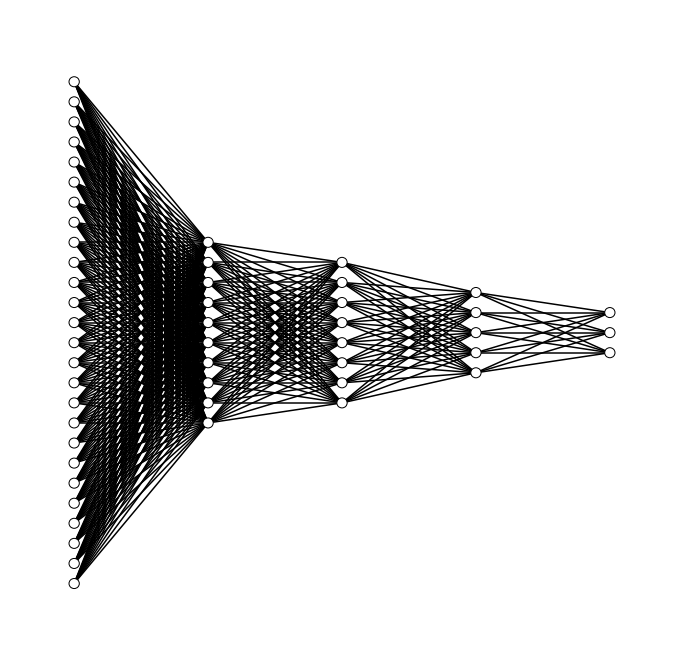

In [356]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [26, 10, 8, 5, 3])

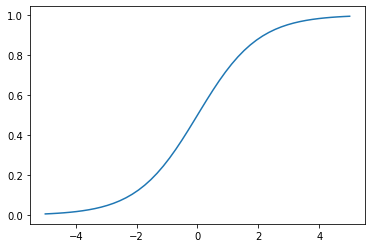

In [357]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [372]:
learning_rate = 0.2 # slowly update the network
error = []
#import torch
#w1 = torch.tensor(w1).float()
for epoch in range(8):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-1.0 * (np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

Error: 0.2640924857617943


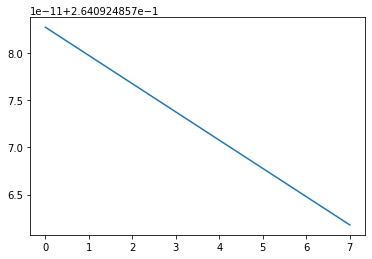

In [373]:
plt.plot(error)

In [374]:
X = test.values[:,:26]
#X = np.array(X, dtype=np.float)
y = np.array([targets[int(x)] for x in test.values[:,26:27]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.625, 0.016, 0.359],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.   , 0.396, 0.525],
       [0.   , 0.358, 0.629],
       [0.   , 0.   , 1.   ],
       [0.625, 0.016, 0.359],
       [0.   , 0.358, 0.629],
       [0.625, 0.016, 0.359],
       [0.   , 0.396, 0.525],
       [0.625, 0.016, 0.359],
       [0.   , 0.358, 0.629],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.   , 0.   , 1.   ],
       [0.625, 0.016, 0.359],
       [0.   , 0.396, 0.525],
       [0.   , 0.358, 0.629],
       [0.625, 0.016, 0.359],
       [0.   , 0.396, 0.525],
       [0.625, 0.016, 0.359],
       [0.   , 0.   , 1.   ],
       [0.   , 0.54 , 0.394],
       [0.625, 0.016, 0.359],
       [0.   , 0.358, 0.629],
       [0.625, 0.016, 0.359],
       [0.625, 0.016, 0.359],
       [0.

In [375]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)
#mapping = {'skiddie':0, 'HEO': 1, 'hacker':2}
testres = test[['label']].replace([0,1,2], ['skiddie','HEO','hacker'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['skiddie','HEO','hacker'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

       label Prediction
361  skiddie    skiddie
671   hacker     hacker
735   hacker     hacker
856   hacker    skiddie
53   skiddie    skiddie
..       ...        ...
745   hacker     hacker
723   hacker     hacker
788   hacker     hacker
14   skiddie    skiddie
628   hacker    skiddie

[110 rows x 2 columns]
Correct: 76 / 110 : 69.0909090909091 %


In [21]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

df.values

array([[ 1., 12., 12., ...,  0.,  0.,  0.],
       [ 1., 12., 12., ...,  0.,  0.,  0.],
       [ 1., 13., 12., ...,  0.,  0.,  0.],
       ...,
       [ 1., 36., 12., ...,  1.,  1.,  1.],
       [ 1., 36., 12., ...,  1.,  1.,  1.],
       [ 1., 36., 10., ...,  1.,  1.,  1.]])

In [380]:
X = df.values[:,:26]
Y = df.values[:,26]

In [438]:
X.shape


(1100, 26)

In [439]:
# Set Seed
seed = 7
np.random.seed(seed)

In [474]:
# Deep Learnig Function
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(52, input_dim=26, activation='relu'))
    deepml.add(Dense(50, activation='relu'))
    deepml.add(Dense(48, activation='relu'))
    deepml.add(Dense(44, activation='relu'))
    deepml.add(Dense(42, activation='relu'))
    deepml.add(Dense(40, activation='relu'))
    deepml.add(Dense(30, activation='relu'))
    deepml.add(Dense(15, activation='relu'))
    deepml.add(Dense(5, activation='relu'))
    deepml.add(Dense(3, activation='softmax'))
    # Model Compilation
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml

In [22]:
# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_Y)

In [483]:
estimate = KerasClassifier(build_fn=deepml_model, epochs=100, batch_size=100, verbose=1)

In [484]:
k_fold = KFold(n_splits=11, shuffle=True, random_state=seed)

In [485]:
results = cross_val_score(estimate, X, y_dummy, cv=k_fold)
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#print('Accuracy: %.2f' % (results.accuracy*100))

Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Train on 1000 samples
Epoch 1/100
Model: nan% (nan%)


In [32]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = df.values[:,:26]
#y = df.values[:,26]
# define the keras model
model = Sequential()
model.add(Dense(42, input_dim=26, activation='relu'))
#model.add(Dense(21, activation='relu'))
model.add(Dense(7, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y_dummy, epochs=20, batch_size=3)
# evaluate the keras model
_, accuracy = model.evaluate(X, y_dummy)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
367/367 [==============================] - 2s 2ms/step - loss: 1252.9980 - accuracy: 0.5414
Epoch 2/20
367/367 [==============================] - 1s 2ms/step - loss: 26.7629 - accuracy: 0.7860
Epoch 3/20
367/367 [==============================] - 1s 1ms/step - loss: 25.4950 - accuracy: 0.8161
Epoch 4/20
367/367 [==============================] - 1s 1ms/step - loss: 32.5906 - accuracy: 0.8116
Epoch 5/20
367/367 [==============================] - 1s 1ms/step - loss: 30.1295 - accuracy: 0.8068
Epoch 6/20
367/367 [==============================] - 1s 1ms/step - loss: 37.4659 - accuracy: 0.8147
Epoch 7/20
367/367 [==============================] - 1s 1ms/step - loss: 22.6811 - accuracy: 0.8322
Epoch 8/20
367/367 [==============================] - 1s 1ms/step - loss: 30.6290 - accuracy: 0.8248
Epoch 9/20
367/367 [==============================] - 1s 2ms/step - loss: 19.5566 - accuracy: 0.8546
Epoch 10/20
367/367 [==============================] - 1s 1ms/step - loss: 32.3289 - accu

In [ ]:
sns.pairplot(data=df,hue="label",palette="Set2")
plt.show()